In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import datetime
from tqdm import tqdm
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'TakaoPGothic'

In [7]:
df = pd.read_csv('active_shops_with_latlon.csv')
display(df.shape)
display(df.head())

(857, 10)

,Unnamed: 0,name,pref,review_score,review_num,status,url,address,lat,lon
0,0,ラーメン二郎 ひばりヶ丘駅前店,東京都,89.00,"1,043",営業,https://ramendb.supleks.jp/s/4738.html,〒188-0001 東京都西東京市谷戸町3-27-24 ひばりヶ丘プラザ1F,35.750075,139.543763
1,1,ラーメン二郎 八王子野猿街道店2,東京都,88.20,"1,053",営業,https://ramendb.supleks.jp/s/4017.html,〒192-0355 東京都八王子市堀之内2-13-16,35.629525,139.401362
2,2,ラーメン二郎 横浜関内店,神奈川県,87.72,"1,027",営業,https://ramendb.supleks.jp/s/2532.html,〒231-0033 神奈川県横浜市中区長者町6-94,35.442006,139.630675
3,3,ラーメン二郎 神田神保町店,東京都,87.57,93,営業,https://ramendb.supleks.jp/s/105637.html,〒101-0051 東京都千代田区神田神保町1-21-4,35.695364,139.761030
4,4,ラーメン二郎 めじろ台店,東京都,87.37,111,営業,https://ramendb.supleks.jp/s/99697.html,〒193-0942 東京都八王子市椚田町513-9,35.638958,139.312231


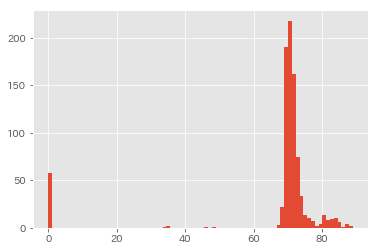

In [8]:
df.review_score.hist(bins=80)

In [11]:
from folium import Map, Marker, CustomIcon, LayerControl
from folium.plugins import HeatMap

# いらすとやから「もやしがたくさん乗ったラーメンのイラスト」をアイコン用に拝借
icon_ramen = "https://2.bp.blogspot.com/-09XFbYdTmLs/VwIgXThmQWI/AAAAAAAA5bg/3TdIOG1frrEsHFWOGi5GTqD4X5k8qrxJQ/s400/ramen_moyashi.png"

# ラーメン屋の店舗名、URL、レビュースコア、緯度経度が入ったpandas データフレーム
df = pd.read_csv('active_shops_with_latlon.csv')
# foliumのMapオブジェクトを作成。初期位置は、データに含まれる緯度経度を利用
m = Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=5)
# Mapオブジェクトに、緯度経度ベースのヒートマップを追加。
# なお、ラーメンデータベース上のレビュースコアによる重みをつけている(スコアが高いと色が濃くなる)
HeatMap(df[['lat', 'lon','review_score']].values.tolist(),name="ヒートマップ").add_to(m)
for row in df.itertuples():
    # 一店舗ずつマーカーをMapオブジェクトに追加していく。
    Marker(location=(row.lat, row.lon),
                 # ポップアップに表示する項目をhtmlタグで設定
                 popup='<a href="{url}" target="_blank">{name}</a>'.format(url=row.url, name=row.name),
                 # CustomIconを使うことで、任意の画像をマーカーのアイコンに設定可能
                 icon=CustomIcon(icon_ramen,
                                 icon_size=(20,20),
                                 popup_anchor=(0, 0)),
                 ).add_to(m)
# 描画したレイヤーをコントロールするパネルを追加。作成されたファイルの右上に追加できる。
LayerControl().add_to(m)
# 作成したMapオブジェクトをhtmlとして保存
m.save("heatmap.html")
